In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn
seaborn.set()

/Users/alexeygilman/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data = pd.read_csv("5G.rpkm.La.csv")

In [3]:
data.fillna(0, inplace = True)
len(data[pd.isnull(data["5GB1_vial_wLa_TR3"])]) #some magic to check if column contains NaN values 

0

In [4]:
#Create a column of log2 of expression level 
data["Log2_5GB1_vial_wLa_TR3"]=data["5GB1_vial_wLa_TR3"].apply(np.log2)
data["Log2_5GB1_vial_woLa_TR2"]=data["5GB1_vial_woLa_TR2"].apply(np.log2)

In [5]:
#Replace the -inf values with zero
data["Log2_5GB1_vial_wLa_TR3"].replace(float('-inf'), 0, inplace = True)
data["Log2_5GB1_vial_woLa_TR2"].replace(float('-inf'), 0, inplace = True)

In [6]:
#Log2(expression) difference. Control - Treatment. Positive values = high expression w/o La. Neg = High expression w La
data["M_Log_Diff"]=(data["Log2_5GB1_vial_woLa_TR2"]-data["Log2_5GB1_vial_wLa_TR3"])
data["A_Log_Ave"]=(data["Log2_5GB1_vial_woLa_TR2"]+data["Log2_5GB1_vial_wLa_TR3"])/2

In [7]:
#raplce the zero values with a nan (float value)
#data["M_Log_Diff"].replace(0, np.nan, inplace = True)

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   4.00000000e+00,   5.00000000e+00,
          3.00000000e+00,   7.00000000e+00,   1.90000000e+01,
          2.80000000e+01,   5.80000000e+01,   1.67000000e+02,
          6.10000000e+02,   1.89400000e+03,   1.14000000e+03,
          3.35000000e+02,   1.16000000e+02,   4.30000000e+01,
          2.80000000e+01,   2.40000000e+01,   1.20000000e+01,
          1.10000000e+01,   3.00000000e+00,   6.00000000e+00,
          6.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

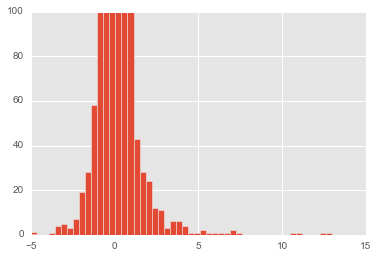

In [8]:
%matplotlib inline
plt.style.use('ggplot')
axes = plt.gca()
axes.set_ylim([0,100])
plt.hist(data["M_Log_Diff"],bins = 50, range = [-5,13]) #[np.nanmin(data["Log_Diff"]), np.nanmax(data["Log_Diff"])]) 

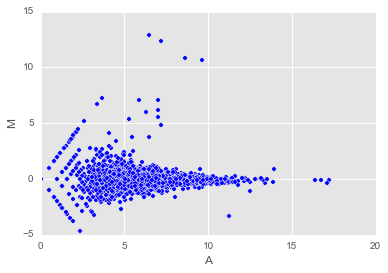

In [9]:
#MA plot
plt.scatter(data["A_Log_Ave"],data["M_Log_Diff"])
axes = plt.gca()
axes.set_xlim([0,20])
axes.set_ylim([-5,15])
plt.ylabel('M')
plt.xlabel('A')
#plt.imshow

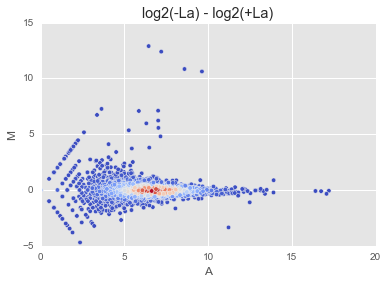

In [10]:
xy = np.array([data["A_Log_Ave"],data["M_Log_Diff"]])   #create 2d array using the data columns

#xy = np.vstack([data["A_Log_Ave"],data["M_Log_Diff"]])   #can also do it by stacking arrays, must be same length 

z = gaussian_kde(xy)  #create a probability density distribution function for a 2d array

fig, ax = plt.subplots()

ax.scatter(data["A_Log_Ave"], data["M_Log_Diff"], c=z(xy), s=20, cmap=plt.cm.coolwarm) # z(xy) is input to get the
# probability function output

axes = plt.gca()
axes.set_xlim([0,20])
axes.set_ylim([-5,15])
plt.ylabel('M')
plt.xlabel('A')
plt.title("log2(-La) - log2(+La)")
plt.savefig('MA_plot_plut_minus_La.png', bbox_inches='tight')

In [11]:
#Slicing the the A values into bins in order to pick out outliers in every bin 
A_bins = [-1,1,2,3,4,5,6,7,8,9,10,18]
A_group_names = ["0_1","1_2","2_3","3_4","4_5","5_6","6_7","7_8","8_9","9_10","10_18"]
categories = pd.cut(data["A_Log_Ave"], A_bins, labels = A_group_names)
categories

0         0_1
1         0_1
2         0_1
3         0_1
4         0_1
5         0_1
6         0_1
7         0_1
8         0_1
9         0_1
10        0_1
11        0_1
12        0_1
13        0_1
14        0_1
15        0_1
16        0_1
17        0_1
18        0_1
19        0_1
20        0_1
21        0_1
22        0_1
23        0_1
24        0_1
25        0_1
26        0_1
27        0_1
28        0_1
29        0_1
        ...  
4510      8_9
4511      6_7
4512      5_6
4513      5_6
4514      7_8
4515      6_7
4516      8_9
4517      6_7
4518      6_7
4519      7_8
4520      5_6
4521      6_7
4522      6_7
4523      6_7
4524      6_7
4525      7_8
4526      8_9
4527      8_9
4528      7_8
4529     9_10
4530    10_18
4531      7_8
4532      6_7
4533      6_7
4534      5_6
4535      6_7
4536      6_7
4537      6_7
4538      6_7
4539      7_8
Name: A_Log_Ave, dtype: category
Categories (11, object): [0_1 < 1_2 < 2_3 < 3_4 ... 7_8 < 8_9 < 9_10 < 10_18]

In [12]:
data["A_Categories"] = pd.cut(data["A_Log_Ave"], A_bins, labels = A_group_names)
data.head()

,locus_tag,product,5GB1_vial_wLa_TR3,5GB1_vial_woLa_TR2,Log2_5GB1_vial_wLa_TR3,Log2_5GB1_vial_woLa_TR2,M_Log_Diff,A_Log_Ave,A_Categories
0,MBURv2_10001,protein of unknown function,0,0,0,0,0,0,0_1
1,MBURv2_10002,KfrB,0,0,0,0,0,0,0_1
2,MBURv2_10003,Protein traN,0,0,0,0,0,0,0_1
3,MBURv2_10004,Protein TraM,0,0,0,0,0,0,0_1
4,MBURv2_10005,Protein TraL,0,0,0,0,0,0,0_1


In [13]:
grouped = data.groupby("A_Categories")["M_Log_Diff"].describe()
grouped.unstack()

,count,mean,std,min,25%,50%,75%,max
A_Categories,,,,,,,,
0_1,227,0.075638,0.590478,-2.000000,0.000000,0.000000,0.000000,2.000000
1_2,56,0.801561,2.262906,-3.807355,-0.622963,1.000000,2.807355,3.906891
2_3,82,0.060360,1.667077,-4.700440,-0.807355,0.000000,0.807355,5.169925
3_4,239,0.053501,1.160904,-3.222392,-0.530515,0.000000,0.477456,7.266787
4_5,517,0.035413,0.740998,-2.690316,-0.362570,0.000000,0.430634,4.108524
5_6,850,0.017148,0.589281,-1.912537,-0.285402,0.000000,0.283287,7.081084
6_7,1122,-0.022970,0.577669,-1.584963,-0.252069,-0.055497,0.167182,12.895954
7_8,801,-0.011982,0.671898,-1.230780,-0.233409,-0.049469,0.107714,12.396872
8_9,400,-0.027070,0.597742,-1.651196,-0.201252,-0.042253,0.100014,10.841040


In [14]:
def get_outliers(x):
    mu = x.mean()
    std = x.std()
    return x[(x < mu - 3*std) | (x > mu + 3*std)]

In [15]:
result = data.groupby("A_Categories")["M_Log_Diff"].apply(get_outliers)

In [16]:
result

A_Categories      
0_1           148      2.000000
              204      2.000000
              724      2.000000
              756     -2.000000
              1545     2.000000
              1649     2.000000
              2068     2.000000
              2733     2.000000
              2755    -2.000000
              2894     2.000000
              3082    -2.000000
              3083     2.000000
              3406     2.000000
              4108     2.000000
2_3           994      5.169925
3_4           3933     6.727920
              3934     7.266787
4_5           281      2.747234
              992     -2.690316
              3166     4.108524
              3167     2.938599
              3619     2.382470
              3803     3.402098
5_6           206     -1.912537
              631     -1.798366
              1519     2.195016
              2717     2.506960
              3931     5.351675
              3932     3.718818
              3941     7.081084
6_7           3936   

In [17]:
my_index = result.index.droplevel(0)

In [18]:
final = data.iloc[my_index]

In [19]:
final

,locus_tag,product,5GB1_vial_wLa_TR3,5GB1_vial_woLa_TR2,Log2_5GB1_vial_wLa_TR3,Log2_5GB1_vial_woLa_TR2,M_Log_Diff,A_Log_Ave,A_Categories
148,MBURv2_20062,protein of unknown function,0,4,0.000000,2.000000,2.000000,1.000000,0_1
204,MBURv2_20118,conserved membrane protein of unknown function,1,4,0.000000,2.000000,2.000000,1.000000,0_1
724,MBURv2_30137,CRISPR-associated endoribonuclease Cas2,0,4,0.000000,2.000000,2.000000,1.000000,0_1
756,MBURv2_30169,Linear gramicidin synthase subunit D [Includes...,4,1,2.000000,0.000000,-2.000000,1.000000,0_1
1545,MBURv2_60318,transposase,0,4,0.000000,2.000000,2.000000,1.000000,0_1
1649,MBURv2_80010,protein of unknown function,0,4,0.000000,2.000000,2.000000,1.000000,0_1
2068,MBURv2_130160,Cobalbumin biosynthesis protein,0,4,0.000000,2.000000,2.000000,1.000000,0_1
2733,MBURv2_130828,conserved protein of unknown function,0,4,0.000000,2.000000,2.000000,1.000000,0_1
2755,MBURv2_130850,protein of unknown function,4,0,2.000000,0.000000,-2.000000,1.000000,0_1
2894,MBURv2_130989,"DNA polymerase V, subunit C",0,4,0.000000,2.000000,2.000000,1.000000,0_1


In [21]:
final["A_Categories"]

148       0_1
204       0_1
724       0_1
756       0_1
1545      0_1
1649      0_1
2068      0_1
2733      0_1
2755      0_1
2894      0_1
3082      0_1
3083      0_1
3406      0_1
4108      0_1
994       2_3
3933      3_4
3934      3_4
281       4_5
992       4_5
3166      4_5
3167      4_5
3619      4_5
3803      4_5
206       5_6
631       5_6
1519      5_6
2717      5_6
3931      5_6
3932      5_6
3941      5_6
3936      6_7
3944      6_7
3945      6_7
3937      7_8
3939      7_8
3940      7_8
3942      7_8
3943      7_8
3935      8_9
3938     9_10
3833    10_18
Name: A_Categories, dtype: category
Categories (11, object): [0_1 < 1_2 < 2_3 < 3_4 ... 7_8 < 8_9 < 9_10 < 10_18]

In [22]:
final_list = final[final.A_Categories != "0_1"]
final_list

,locus_tag,product,5GB1_vial_wLa_TR3,5GB1_vial_woLa_TR2,Log2_5GB1_vial_wLa_TR3,Log2_5GB1_vial_woLa_TR2,M_Log_Diff,A_Log_Ave,A_Categories
994,MBURv2_50227,protein of unknown function,0,36,0.000000,5.169925,5.169925,2.584963,2_3
3933,MBURv2_210289,protein of unknown function,0,106,0.000000,6.727920,6.727920,3.363960,3_4
3934,MBURv2_210290,"DNA binding response regulator MxaB, LuxR fami...",0,154,0.000000,7.266787,7.266787,3.633393,3_4
281,MBURv2_20195,protein of unknown function,7,47,2.807355,5.554589,2.747234,4.180972,4_5
992,MBURv2_50225,Integrase catalytic region (fragment),71,11,6.149747,3.459432,-2.690316,4.804589,4_5
3166,MBURv2_160247,MotA/TolQ/ExbB proton channel family protein,4,69,2.000000,6.108524,4.108524,4.054262,4_5
3167,MBURv2_160248,MotA/TolQ/ExbB proton channel family domain pr...,6,46,2.584963,5.523562,2.938599,4.054262,4_5
3619,MBURv2_190107,protein of unknown function,14,73,3.807355,6.189825,2.382470,4.998590,4_5
3803,MBURv2_210159,conserved protein of unknown function,7,74,2.807355,6.209453,3.402098,4.508404,4_5
206,MBURv2_20120,protein of unknown function,64,17,6.000000,4.087463,-1.912537,5.043731,5_6


In [23]:
final_list.groupby("A_Categories")["M_Log_Diff"].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
A_Categories,,,,,,,,
0_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_3,1,5.169925,NaN,5.169925,5.169925,5.169925,5.169925,5.169925
3_4,2,6.997353,0.381036,6.727920,6.862637,6.997353,7.132070,7.266787
4_5,6,2.148102,2.443965,-2.690316,2.473661,2.842917,3.286224,4.108524
5_6,7,2.448950,3.381941,-1.912537,0.198325,2.506960,4.535247,7.081084
6_7,3,7.555796,4.750735,3.798742,4.885717,5.972693,9.434323,12.895954
7_8,5,7.219302,3.015754,4.805445,5.565854,6.219814,7.108524,12.396872
8_9,1,10.841040,NaN,10.841040,10.841040,10.841040,10.841040,10.841040


In [24]:
final_list.count()

locus_tag                  27
product                    27
5GB1_vial_wLa_TR3          27
5GB1_vial_woLa_TR2         27
Log2_5GB1_vial_wLa_TR3     27
Log2_5GB1_vial_woLa_TR2    27
M_Log_Diff                 27
A_Log_Ave                  27
A_Categories               27
dtype: int64